# SIMPLE LINEAR REGRESSION USING PYTHON SCIKIT LEARN #

In this task, we will predict the score of a student (in percentage) that is expected based upon number of hours he/she studied.

In [201]:
#import certain libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

We can read the data by two methods:
(1) By reading data from remote link.
     ( myurl = "http://bit.ly/w-data"
      data = pd.read_csv(myurl) )

(2) By reading from a csv file. (My preferred method)

## Understanding the data ##

In [202]:
#Reading the csv file to import the data
data = pd.read_csv(r"C:\Users\prate\OneDrive\Desktop\scores.csv")

#Displaying the stored data using head function
data.head(-1)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


This is the data that we have been given and from this data, we have to perform Exploratory Data Analysis.

In [203]:
# This is the basic properties of our data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [204]:
# data type
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [205]:
# we will check whether the data has any null or missing value.
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [206]:
data.isnull().any()

Hours     False
Scores    False
dtype: bool

Since, there are no missing or null values, we can move to further exploration.

## Exploratory Data Analysis ##

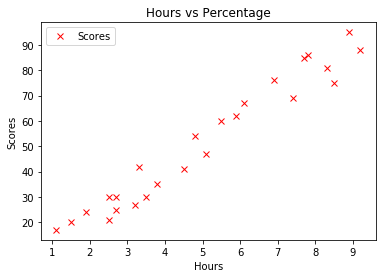

In [207]:
# First, we can plot a basic regression plot using matplotlib
data.plot(x = "Hours", y = "Scores", style = 'rx')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours vs Percentage")
plt.show()

By viewing the above graph, we can see that there is a simple linear relation between our two training examples.

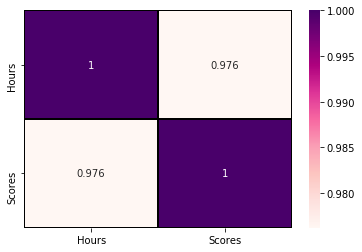

In [208]:
# second, we can now calculate the corelation between two examples using heatmap
sb.heatmap(data.corr(), annot = True, fmt = '.3g', linewidth = 1, linecolor = 'black', cmap = "RdPu")

Here, we can clearly see that there is a high correlation between these two. (0.976) This shows thta these 2 are highly dependent on each other.

In [209]:
# third, we can also use Pearson Correlation score
from scipy.stats import pearsonr
pcs = pearsonr(data["Hours"], data["Scores"])
print(pcs)

(0.9761906560220884, 9.132624467460325e-17)


The first value is again the correlation score between the training examples. 
The second value is the p-value. It can be defined as the probability of obtaining results as extreme as the observed results of a statistical hypothesis test, assuming that the null hypothesis is correct.
According to statistics rule, if p-value < 0.05, then we can reject our null hypothesis and declare that our hypothesis is statistically significant.  
(9.132624467460325e-17 << 0.05)

## Model Building ##

In [210]:
# We will first divide our data into inputs and outputs
X = data.iloc[:, 0:-1].values     # slicing up the last column and putting altogether in an array 
y = data.iloc[:, 1].values        # slicing up the all the columns and putting altogether in an array 
print(X.shape)
print(y.shape)

(25, 1)
(25,)


Now, we have divided the data set into input and output. So, the next step is to split the data set into training and test data set. 

In [211]:
from sklearn.model_selection import train_test_split
X_train, y_train, X_test, y_test = train_test_split(X, y, random_state = 0)

In [212]:
# Fitting the model
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
X_train = data["Hours"].values.reshape(-1, 1)
y_train = data["Scores"].values.reshape(-1, 1)
l_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We have to reshape the data as it is important in sklearn.

In [213]:
# Predicting the score
X_test = data["Hours"].values.reshape(-1, 1)
y_test = data["Scores"].values.reshape(-1, 1)
l_reg.score(X_test, y_test)

0.9529481969048356

Here, we can say that our model is 95% accurate.

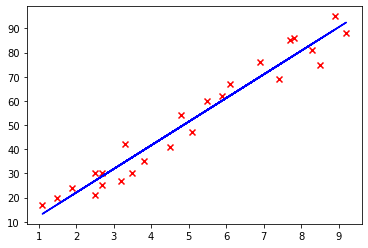

In [214]:
#Plotting the Regression line
l = l_reg.coef_ *X+ l_reg.intercept_

#Plotting the test dataset
plt.scatter(X, y, c = 'red', marker = 'x')
plt.plot(X, l, 'b');
plt.show()

We have successfully plotted a line which shows that our model is successfully fitted across the data.

### Question asked for this assignment ###

 What will be the final score of someone who studies for about 9.25 hours a day?

In [215]:
score_prediction = np.array([[9.25]])   # [[]] is used for converting an array to 1X1 matrix 
pred = l_reg.predict(score_prediction)
print(pred)

[[92.90985477]]


So, for a student who studies 9.25 hrs per day will likely to get around 93% score, which is according to me is a good score.

## ASSIGNMENT COMPLETED